### YASSIR ETA PREDICTION
### Hypotheses
#### 1. Yassir has more rides during the weekend than weekdays
#### 2. The ETAs are shorter during night time than during the day.


### Questions
#### 1. What weather conditions causes the ETAs to fluctuate the most
#### 2.Does different times in the day  have relatively same ETAs(in terms of being longer or shorter during the day or night)
#### 3. Does rainfall increase the ETA of a trip
#### 4. Does having a good weather mean having a shorter ETA when using a ride on Yassir
#### 5. Does rainfall mean having alot of trips starting on Yassir

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import pylab as plt
import plotly.graph_objects as go
import warnings
warnings.filterwarnings('ignore')
import matplotlib.dates as mdates
import calplot

from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn import cluster
from sklearn import model_selection
from sklearn.preprocessing import StandardScaler, PowerTransformer
from sklearn.linear_model import LinearRegression
from sklearn.compose import TransformedTargetRegressor
from sklearn import pipeline 
from sklearn.compose import ColumnTransformer
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin
from pandas_profiling import ProfileReport
%matplotlib inline

In [2]:
test_data = pd.read_csv("/Users/emmanythedon/Documents/CApstone /Test.csv")
train_data= pd.read_csv("/Users/emmanythedon/Documents/CApstone /Train.csv")
weather = pd.read_csv("/Users/emmanythedon/Documents/CApstone /Weather.csv")

In [3]:
train_data.head()

ID             Timestamp  Origin_lat  Origin_lon  Destination_lat  \
0  000FLWA8  2019-12-04T20:01:50Z       3.258      36.777            3.003   
1  000RGOAM  2019-12-10T22:37:09Z       3.087      36.707            3.081   
2  001QSGIH  2019-11-23T20:36:10Z       3.144      36.739            3.088   
3  002ACV6R  2019-12-01T05:43:21Z       3.239      36.784            3.054   
4  0039Y7A8  2019-12-17T20:30:20Z       2.912      36.707            3.207   

   Destination_lon  Trip_distance   ETA  
0           36.718          39627  2784  
1           36.727           3918   576  
2           36.742           7265   526  
3           36.763          23350  3130  
4           36.698          36613  2138

In [4]:
test_data.head()

ID             Timestamp  Origin_lat  Origin_lon  Destination_lat  \
0  000V4BQX  2019-12-21T05:52:37Z       2.981      36.688            2.978   
1  003WBC5J  2019-12-25T21:38:53Z       3.032      36.769            3.074   
2  004O4X3A  2019-12-29T21:30:29Z       3.035      36.711            3.010   
3  006CEI5B  2019-12-31T22:51:57Z       2.902      36.738            3.208   
4  009G0M2T  2019-12-28T21:47:22Z       2.860      36.692            2.828   

   Destination_lon  Trip_distance  
0           36.754          17549  
1           36.751           7532  
2           36.758          10194  
3           36.698          32768  
4           36.696           4513

In [5]:
train_data.drop(['ID'],axis=1, inplace = True)

In [6]:
#train_data.profile_report()

In [7]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83924 entries, 0 to 83923
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Timestamp        83924 non-null  object 
 1   Origin_lat       83924 non-null  float64
 2   Origin_lon       83924 non-null  float64
 3   Destination_lat  83924 non-null  float64
 4   Destination_lon  83924 non-null  float64
 5   Trip_distance    83924 non-null  int64  
 6   ETA              83924 non-null  int64  
dtypes: float64(4), int64(2), object(1)
memory usage: 4.5+ MB


In [8]:
train_data.shape

(83924, 7)

In [9]:
weather.head()

date  dewpoint_2m_temperature  maximum_2m_air_temperature  \
0  2019-11-01               290.630524                  296.434662   
1  2019-11-02               289.135284                  298.432404   
2  2019-11-03               287.667694                  296.612122   
3  2019-11-04               287.634644                  297.173737   
4  2019-11-05               286.413788                  294.284851   

   mean_2m_air_temperature  mean_sea_level_pressure  \
0               294.125061            101853.617188   
1               295.551666            101225.164062   
2               295.182831            100806.617188   
3               294.368134            101240.929688   
4               292.496979            101131.750000   

   minimum_2m_air_temperature  surface_pressure  total_precipitation  \
0                  292.503998     100806.351562             0.004297   
1                  293.337921     100187.250000             0.001767   
2                  293.674316      99771.414062             0.000797   
3                  292.376221     100200.843750             0.000393   
4                  289.143066     100088.500000             0.004658   

   u_component_of_wind_10m  v_component_of_wind_10m  
0                 3.561323                 0.941695  
1                 5.318593                 3.258237  
2                 8.447649                 3.172982  
3                 5.991428                 2.236700  
4                 6.962730                 2.655364

In [10]:
weather.nunique()

date                          61
dewpoint_2m_temperature       61
maximum_2m_air_temperature    61
mean_2m_air_temperature       61
mean_sea_level_pressure       61
minimum_2m_air_temperature    61
surface_pressure              61
total_precipitation           53
u_component_of_wind_10m       61
v_component_of_wind_10m       61
dtype: int64

In [11]:
weather.isnull().sum()

date                          0
dewpoint_2m_temperature       0
maximum_2m_air_temperature    0
mean_2m_air_temperature       0
mean_sea_level_pressure       0
minimum_2m_air_temperature    0
surface_pressure              0
total_precipitation           0
u_component_of_wind_10m       0
v_component_of_wind_10m       0
dtype: int64

In [12]:
#weather.profile_report()

### Changing the Timestamp column from object datatype to timestamp

In [13]:
train_data['Timestamp'] = train_data['Timestamp'].astype('datetime64')
train_data.head()

Timestamp  Origin_lat  Origin_lon  Destination_lat  \
0 2019-12-04 20:01:50       3.258      36.777            3.003   
1 2019-12-10 22:37:09       3.087      36.707            3.081   
2 2019-11-23 20:36:10       3.144      36.739            3.088   
3 2019-12-01 05:43:21       3.239      36.784            3.054   
4 2019-12-17 20:30:20       2.912      36.707            3.207   

   Destination_lon  Trip_distance   ETA  
0           36.718          39627  2784  
1           36.727           3918   576  
2           36.742           7265   526  
3           36.763          23350  3130  
4           36.698          36613  2138

In [14]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83924 entries, 0 to 83923
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Timestamp        83924 non-null  datetime64[ns]
 1   Origin_lat       83924 non-null  float64       
 2   Origin_lon       83924 non-null  float64       
 3   Destination_lat  83924 non-null  float64       
 4   Destination_lon  83924 non-null  float64       
 5   Trip_distance    83924 non-null  int64         
 6   ETA              83924 non-null  int64         
dtypes: datetime64[ns](1), float64(4), int64(2)
memory usage: 4.5 MB


### Checking for completeness of dates

In [15]:
expected_dates = pd.date_range(start=train_data['Timestamp'].min(),end =
                               train_data['Timestamp'].max())
expected_dates


DatetimeIndex(['2019-11-19 23:00:08', '2019-11-20 23:00:08',
               '2019-11-21 23:00:08', '2019-11-22 23:00:08',
               '2019-11-23 23:00:08', '2019-11-24 23:00:08',
               '2019-11-25 23:00:08', '2019-11-26 23:00:08',
               '2019-11-27 23:00:08', '2019-11-28 23:00:08',
               '2019-11-29 23:00:08', '2019-11-30 23:00:08',
               '2019-12-01 23:00:08', '2019-12-02 23:00:08',
               '2019-12-03 23:00:08', '2019-12-04 23:00:08',
               '2019-12-05 23:00:08', '2019-12-06 23:00:08',
               '2019-12-07 23:00:08', '2019-12-08 23:00:08',
               '2019-12-09 23:00:08', '2019-12-10 23:00:08',
               '2019-12-11 23:00:08', '2019-12-12 23:00:08',
               '2019-12-13 23:00:08', '2019-12-14 23:00:08',
               '2019-12-15 23:00:08', '2019-12-16 23:00:08',
               '2019-12-17 23:00:08', '2019-12-18 23:00:08',
               '2019-12-19 23:00:08'],
              dtype='datetime64[ns]', freq='D'

From expected dates data is from 11pm 19th November 2019 to 11pm 18th December 2019

In [16]:
missing_times=set(expected_dates)- set(train_data['Timestamp'].unique())
missing_times

{Timestamp('2019-11-19 23:00:08', freq='D'),
 Timestamp('2019-11-20 23:00:08', freq='D'),
 Timestamp('2019-11-21 23:00:08', freq='D'),
 Timestamp('2019-11-22 23:00:08', freq='D'),
 Timestamp('2019-11-23 23:00:08', freq='D'),
 Timestamp('2019-11-24 23:00:08', freq='D'),
 Timestamp('2019-11-25 23:00:08', freq='D'),
 Timestamp('2019-11-26 23:00:08', freq='D'),
 Timestamp('2019-11-27 23:00:08', freq='D'),
 Timestamp('2019-11-28 23:00:08', freq='D'),
 Timestamp('2019-11-29 23:00:08', freq='D'),
 Timestamp('2019-11-30 23:00:08', freq='D'),
 Timestamp('2019-12-01 23:00:08', freq='D'),
 Timestamp('2019-12-02 23:00:08', freq='D'),
 Timestamp('2019-12-03 23:00:08', freq='D'),
 Timestamp('2019-12-04 23:00:08', freq='D'),
 Timestamp('2019-12-05 23:00:08', freq='D'),
 Timestamp('2019-12-06 23:00:08', freq='D'),
 Timestamp('2019-12-07 23:00:08', freq='D'),
 Timestamp('2019-12-08 23:00:08', freq='D'),
 Timestamp('2019-12-09 23:00:08', freq='D'),
 Timestamp('2019-12-10 23:00:08', freq='D'),
 Timestamp

In [17]:
# Set time of day based on your specified time frames
train_data.loc[train_data.set_index('Timestamp').index.indexer_between_time('23:59', '4:30'), 'Time_ofthe_day'] = 'mid-night'
train_data.loc[train_data.set_index('Timestamp').index.indexer_between_time('4:30', '12:00'), 'Time_ofthe_day'] = 'morning'
train_data.loc[train_data.set_index('Timestamp').index.indexer_between_time('12:00', '16:30'), 'Time_ofthe_day'] = 'afternoon'
train_data.loc[train_data.set_index('Timestamp').index.indexer_between_time('16:30', '23:59'), 'Time_ofthe_day'] = 'evening'

In [18]:
train_data

Timestamp  Origin_lat  Origin_lon  Destination_lat  \
0     2019-12-04 20:01:50       3.258      36.777            3.003   
1     2019-12-10 22:37:09       3.087      36.707            3.081   
2     2019-11-23 20:36:10       3.144      36.739            3.088   
3     2019-12-01 05:43:21       3.239      36.784            3.054   
4     2019-12-17 20:30:20       2.912      36.707            3.207   
...                   ...         ...         ...              ...   
83919 2019-11-30 23:21:58       3.121      36.743            3.032   
83920 2019-11-27 05:59:31       3.024      36.749            2.951   
83921 2019-12-06 05:04:06       3.189      36.721            3.186   
83922 2019-12-07 05:55:22       3.046      36.738            2.986   
83923 2019-12-12 21:22:31       2.889      36.762            2.957   

       Destination_lon  Trip_distance   ETA Time_ofthe_day  
0               36.718          39627  2784        evening  
1               36.727           3918   576        evening  
2               36.742           7265   526        evening  
3               36.763          23350  3130        morning  
4               36.698          36613  2138        evening  
...                ...            ...   ...            ...  
83919           36.770          10321   664        evening  
83920           36.735          10791  1056        morning  
83921           36.721           1139   296        morning  
83922           36.766          10637   895        morning  
83923           36.758           9363   654        evening  

[83924 rows x 8 columns]

In [19]:
train_data =train_data.set_index('Timestamp')
train_data.head()

Origin_lat  Origin_lon  Destination_lat  Destination_lon  \
Timestamp                                                                       
2019-12-04 20:01:50       3.258      36.777            3.003           36.718   
2019-12-10 22:37:09       3.087      36.707            3.081           36.727   
2019-11-23 20:36:10       3.144      36.739            3.088           36.742   
2019-12-01 05:43:21       3.239      36.784            3.054           36.763   
2019-12-17 20:30:20       2.912      36.707            3.207           36.698   

                     Trip_distance   ETA Time_ofthe_day  
Timestamp                                                
2019-12-04 20:01:50          39627  2784        evening  
2019-12-10 22:37:09           3918   576        evening  
2019-11-23 20:36:10           7265   526        evening  
2019-12-01 05:43:21          23350  3130        morning  
2019-12-17 20:30:20          36613  2138        evening

In [20]:
train_data.index

DatetimeIndex(['2019-12-04 20:01:50', '2019-12-10 22:37:09',
               '2019-11-23 20:36:10', '2019-12-01 05:43:21',
               '2019-12-17 20:30:20', '2019-12-01 04:21:03',
               '2019-12-10 23:08:35', '2019-11-26 20:41:42',
               '2019-12-02 05:24:25', '2019-12-05 23:10:00',
               ...
               '2019-11-27 05:49:23', '2019-12-13 22:18:06',
               '2019-12-14 21:19:56', '2019-12-06 20:49:50',
               '2019-11-22 00:28:19', '2019-11-30 23:21:58',
               '2019-11-27 05:59:31', '2019-12-06 05:04:06',
               '2019-12-07 05:55:22', '2019-12-12 21:22:31'],
              dtype='datetime64[ns]', name='Timestamp', length=83924, freq=None)

In [21]:
# Analyzing timestamp column using pandas time-based indexing
train_data['Month'] = train_data.index.month
train_data['Days'] =train_data.index.day_name()
train_data

Origin_lat  Origin_lon  Destination_lat  Destination_lon  \
Timestamp                                                                       
2019-12-04 20:01:50       3.258      36.777            3.003           36.718   
2019-12-10 22:37:09       3.087      36.707            3.081           36.727   
2019-11-23 20:36:10       3.144      36.739            3.088           36.742   
2019-12-01 05:43:21       3.239      36.784            3.054           36.763   
2019-12-17 20:30:20       2.912      36.707            3.207           36.698   
...                         ...         ...              ...              ...   
2019-11-30 23:21:58       3.121      36.743            3.032           36.770   
2019-11-27 05:59:31       3.024      36.749            2.951           36.735   
2019-12-06 05:04:06       3.189      36.721            3.186           36.721   
2019-12-07 05:55:22       3.046      36.738            2.986           36.766   
2019-12-12 21:22:31       2.889      36.762            2.957           36.758   

                     Trip_distance   ETA Time_ofthe_day  Month       Days  
Timestamp                                                                  
2019-12-04 20:01:50          39627  2784        evening     12  Wednesday  
2019-12-10 22:37:09           3918   576        evening     12    Tuesday  
2019-11-23 20:36:10           7265   526        evening     11   Saturday  
2019-12-01 05:43:21          23350  3130        morning     12     Sunday  
2019-12-17 20:30:20          36613  2138        evening     12    Tuesday  
...                            ...   ...            ...    ...        ...  
2019-11-30 23:21:58          10321   664        evening     11   Saturday  
2019-11-27 05:59:31          10791  1056        morning     11  Wednesday  
2019-12-06 05:04:06           1139   296        morning     12     Friday  
2019-12-07 05:55:22          10637   895        morning     12   Saturday  
2019-12-12 21:22:31           9363   654        evening     12   Thursday  

[83924 rows x 9 columns]

In [22]:
train_data['ETA'].max(),train_data['ETA'].min()

(5238, 1)

In [23]:
weather.head()

date  dewpoint_2m_temperature  maximum_2m_air_temperature  \
0  2019-11-01               290.630524                  296.434662   
1  2019-11-02               289.135284                  298.432404   
2  2019-11-03               287.667694                  296.612122   
3  2019-11-04               287.634644                  297.173737   
4  2019-11-05               286.413788                  294.284851   

   mean_2m_air_temperature  mean_sea_level_pressure  \
0               294.125061            101853.617188   
1               295.551666            101225.164062   
2               295.182831            100806.617188   
3               294.368134            101240.929688   
4               292.496979            101131.750000   

   minimum_2m_air_temperature  surface_pressure  total_precipitation  \
0                  292.503998     100806.351562             0.004297   
1                  293.337921     100187.250000             0.001767   
2                  293.674316      99771.414062             0.000797   
3                  292.376221     100200.843750             0.000393   
4                  289.143066     100088.500000             0.004658   

   u_component_of_wind_10m  v_component_of_wind_10m  
0                 3.561323                 0.941695  
1                 5.318593                 3.258237  
2                 8.447649                 3.172982  
3                 5.991428                 2.236700  
4                 6.962730                 2.655364

In [24]:
weather.date.min(),weather.date.max() 

('2019-11-01', '2019-12-31')

In [25]:
weather.shape

(61, 10)

#### Checking for outliers in the ETA column with the use of a box plot

<AxesSubplot:xlabel='ETA'>

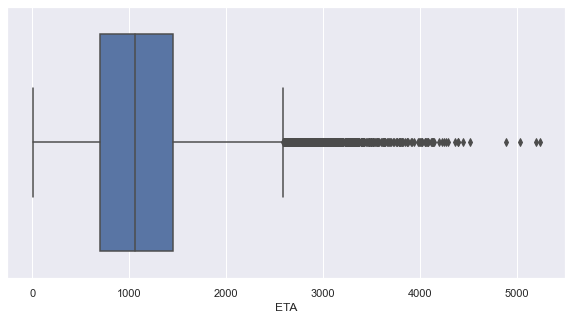

In [26]:
sns.set(rc = {'figure.figsize':(10,5)})
sns.boxplot(train_data['ETA'])

### Hypothesis 1
#### 1. Yassir has more rides during the weekend than weekdays

In [27]:
# Adding weekend or no weekend column by mapping days of the week with the use of a dictionary
train_data['Weekend/Weekday']= train_data['Days'].map(
                              {'Monday':'Weekday','Tuesday':'Weekday','Wednesday':'Weekday','Thursday':'Weekday',
                                                     'Friday':'Weekday', 'Saturday': 'Weekend','Sunday':'Weekend'})
train_data

Origin_lat  Origin_lon  Destination_lat  Destination_lon  \
Timestamp                                                                       
2019-12-04 20:01:50       3.258      36.777            3.003           36.718   
2019-12-10 22:37:09       3.087      36.707            3.081           36.727   
2019-11-23 20:36:10       3.144      36.739            3.088           36.742   
2019-12-01 05:43:21       3.239      36.784            3.054           36.763   
2019-12-17 20:30:20       2.912      36.707            3.207           36.698   
...                         ...         ...              ...              ...   
2019-11-30 23:21:58       3.121      36.743            3.032           36.770   
2019-11-27 05:59:31       3.024      36.749            2.951           36.735   
2019-12-06 05:04:06       3.189      36.721            3.186           36.721   
2019-12-07 05:55:22       3.046      36.738            2.986           36.766   
2019-12-12 21:22:31       2.889      36.762            2.957           36.758   

                     Trip_distance   ETA Time_ofthe_day  Month       Days  \
Timestamp                                                                   
2019-12-04 20:01:50          39627  2784        evening     12  Wednesday   
2019-12-10 22:37:09           3918   576        evening     12    Tuesday   
2019-11-23 20:36:10           7265   526        evening     11   Saturday   
2019-12-01 05:43:21          23350  3130        morning     12     Sunday   
2019-12-17 20:30:20          36613  2138        evening     12    Tuesday   
...                            ...   ...            ...    ...        ...   
2019-11-30 23:21:58          10321   664        evening     11   Saturday   
2019-11-27 05:59:31          10791  1056        morning     11  Wednesday   
2019-12-06 05:04:06           1139   296        morning     12     Friday   
2019-12-07 05:55:22          10637   895        morning     12   Saturday   
2019-12-12 21:22:31           9363   654        evening     12   Thursday   

                    Weekend/Weekday  
Timestamp                            
2019-12-04 20:01:50         Weekday  
2019-12-10 22:37:09         Weekday  
2019-11-23 20:36:10         Weekend  
2019-12-01 05:43:21         Weekend  
2019-12-17 20:30:20         Weekday  
...                             ...  
2019-11-30 23:21:58         Weekend  
2019-11-27 05:59:31         Weekday  
2019-12-06 05:04:06         Weekday  
2019-12-07 05:55:22         Weekend  
2019-12-12 21:22:31         Weekday  

[83924 rows x 10 columns]

<AxesSubplot:xlabel='ETA', ylabel='Trip_distance'>

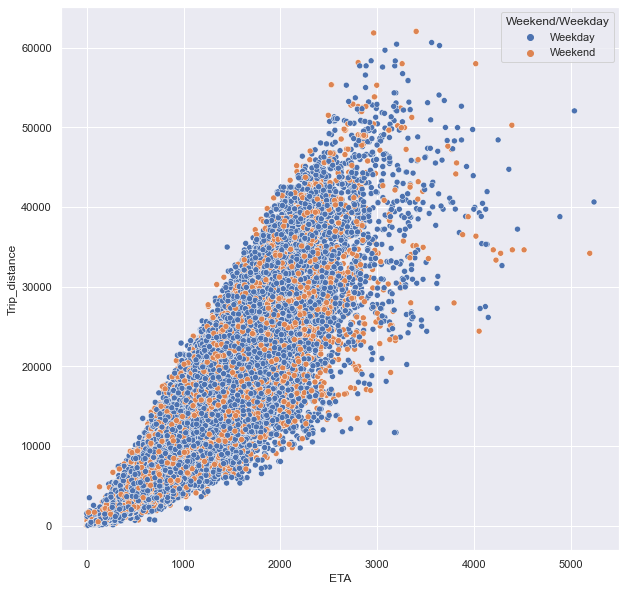

In [28]:
plt.figure(figsize = (10,10))
sns.scatterplot(data= train_data, x="ETA", y = 'Trip_distance',hue= "Weekend/Weekday")

From the plot above, I assume that every trip made has 1 recorded ETA and Trip distance.Hence to find out if 
more trips are recorded during the weekends or the weekdays the trip's distance and ETA where used and from the scatter 
plot above we can see that more trips are recorded during the weekdays than the weekends

<AxesSubplot:>

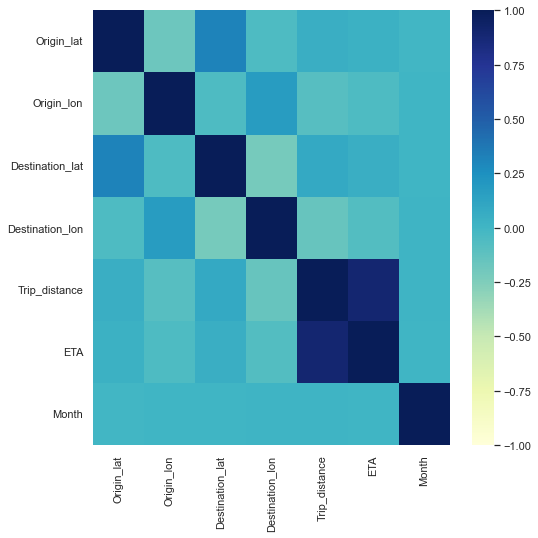

In [29]:
plt.figure(figsize = (8,8))
sns.heatmap(train_data.corr(), vmin = -1 , cmap = 'YlGnBu')

### Hypothses 2

#### The ETAs are shorter during night time than during the day.

### Questions

#### 1. What weather conditions causes the ETAs to fluctuate the most

#### 2.Does different times in the day  have relatively same ETAs(in terms of being longer or shorter during the day or night)


In [30]:
train_data.head()

Origin_lat  Origin_lon  Destination_lat  Destination_lon  \
Timestamp                                                                       
2019-12-04 20:01:50       3.258      36.777            3.003           36.718   
2019-12-10 22:37:09       3.087      36.707            3.081           36.727   
2019-11-23 20:36:10       3.144      36.739            3.088           36.742   
2019-12-01 05:43:21       3.239      36.784            3.054           36.763   
2019-12-17 20:30:20       2.912      36.707            3.207           36.698   

                     Trip_distance   ETA Time_ofthe_day  Month       Days  \
Timestamp                                                                   
2019-12-04 20:01:50          39627  2784        evening     12  Wednesday   
2019-12-10 22:37:09           3918   576        evening     12    Tuesday   
2019-11-23 20:36:10           7265   526        evening     11   Saturday   
2019-12-01 05:43:21          23350  3130        morning     12     Sunday   
2019-12-17 20:30:20          36613  2138        evening     12    Tuesday   

                    Weekend/Weekday  
Timestamp                            
2019-12-04 20:01:50         Weekday  
2019-12-10 22:37:09         Weekday  
2019-11-23 20:36:10         Weekend  
2019-12-01 05:43:21         Weekend  
2019-12-17 20:30:20         Weekday

In [31]:
import matplotlib.pyplot as plt
import plotly.express as px

In [32]:
# Visualizing the distribution of categories inside the column
fig = px.box(train_data, x= 'ETA', y="Trip_distance", color="Time_ofthe_day", 
             title=f"A visual representation of the trips' EDA with respect Time of the Day "
            )
fig.show()

From the plot above, we can see that trips during mid-night have have shorter ETAs 

#### 3. Does rainfall increase the ETA of a trip

#### 4. Does having a good weather mean having a shorter ETA when using a ride on Yassir


#### 5. Does rainfall mean having alot of trips starting on Yassir

In [ ]:
### Data Spliting into train and eval datasets

In [ ]:
# make sure sorted by date
training = train_data.sort_values('Timestamp')
train_df = train_data.iloc[:-20000]
eval_df = train_data.iloc[-20000:]
eval_df.shape,train_df.shape